In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analysis of pedestrian activity pre and during Covid-19 pandemic outbreak

In [ ]:
import pandas as pd
import csv
import datetime
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20})

In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/NN/data/'
result_path = '/content/drive/My Drive/Colab Notebooks/NN/results/'
# getting csv files with all the data
csv_file = sorted(glob.glob(data_path + '*.csv'))
csvs = len(csv_file)

print('Loaded %d csv files.' %(csvs))

Loaded 24 csv files.


In [ ]:
# REMEMBER: data in the csv files are of the form:
# date, person, bicycle, car, motorcycle, airplane, bus, train, truck, boat
# in particular, 
# YYYY-MM-DD_hh-00,n0,n1,n2,n3,n4,n5,n6,n7,n8, where ni = # detections of object of class i
# i = 0, ..., 8

def read_count(file):
    title = file[48:-4]
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d_%H-%M')
    df = pd.read_csv(file, parse_dates=['date'], date_parser=dateparse)
    df.insert(0, "location", title)
    return df

df = pd.DataFrame()
for i in range(csvs):
  df = df.append(read_count(csv_file[i]))

df

,location,date,person,bicycle,car,motorcycle,airplane,bus,train,truck,boat
0,all_saints_square-2016,2016-06-09 09:00:00,7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,all_saints_square-2016,2016-06-09 10:00:00,19,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,all_saints_square-2016,2016-06-09 11:00:00,21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,all_saints_square-2016,2016-06-09 12:00:00,22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,all_saints_square-2016,2016-06-09 13:00:00,26,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
738,wawel-ground_truth,2020-03-31 19:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,wawel-ground_truth,2020-03-31 20:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,wawel-ground_truth,2020-03-31 21:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,wawel-ground_truth,2020-03-31 22:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouped = df.groupby(df.location)
years = [2016, 2017, 2018, 2019, 2020]
locations = ["all_saints_square", "grodzka", "podgorze_market_square", "wawel"]

df_allsaints = pd.DataFrame()
df_grodzka = pd.DataFrame()
df_podgorze_market_square = pd.DataFrame()
df_wawel = pd.DataFrame()

for y in years:
  df_allsaints = grouped.get_group("all_saints_square-"+str(y))
  df_grodzka = grouped.get_group("grodzka-"+str(y))
  df_podgorze_market_square = grouped.get_group("podgorze_market_square-"+str(y))
  df_wawel = grouped.get_group("wawel-"+str(y))

print('Sub-datasets for the locations created.')

Sub-datasets for the locations created.


## Poland government measures in response to Covid-19 outbreak



**1.   March 13**, the Minister of Health has announced the state of epidemic threat with the introduction of the restrictions concerned the cancellation of mass events and the closure of cultural institutions such as orchestras, operas, theatres, museums and cinemas;


**2.   March 24**, further limitations on the obligation of online classes for schools or others on people leaving their homes, on public gatherings by default to a maximum of two people and on prohibited non-essential travels. Everyday activities with no contact with others and the participation of at most two people;

**3. March 31**, minors were prohibited from leaving their homes unaccompanied by a legal guardian. Parks, boulevards and beaches were closed. Individuals walking in public were obliged to be separated by at least two meters.


In [ ]:
rest1 = '2020-03-13'
rest2 = '2020-03-24'  
rest3 = '2020-03-31'

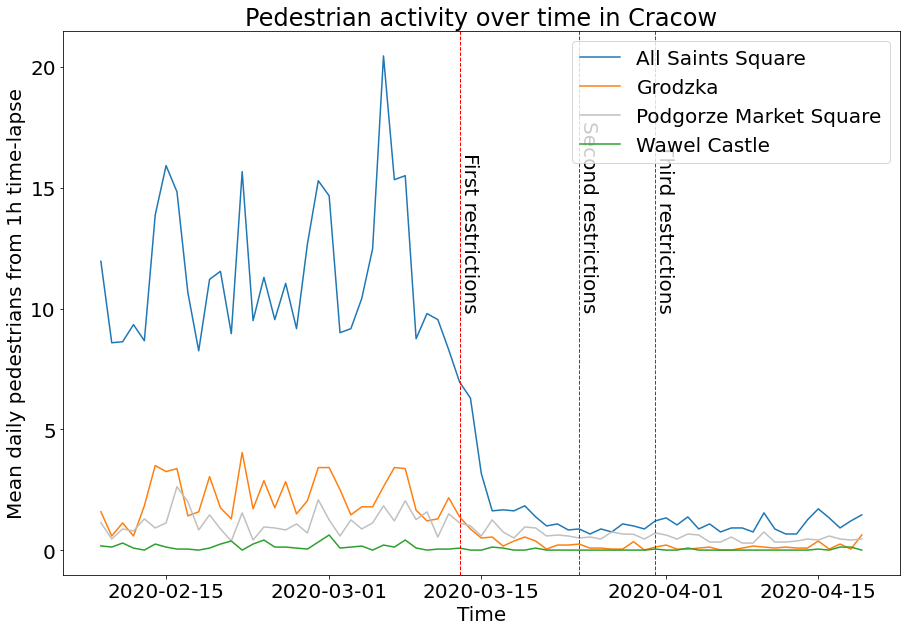

In [ ]:
def plot_key_dates(y=10):    
    x = pd.to_datetime(rest1)
    plt.text(x, y, 'First restrictions', rotation=-90)
    plt.axvline(x=x, color='red', linestyle='dashed', linewidth=1);
    
    x = pd.to_datetime(rest2)
    plt.text(x, y, 'Second restrictions', rotation=-90)
    plt.axvline(x=x, color='red', linestyle='dashed', linewidth=1);

    x = pd.to_datetime(rest3)
    plt.text(x, y, 'Third restrictions', rotation=-90)
    plt.axvline(x=x, color='red', linestyle='dashed', linewidth=1);

steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
t = df_grodzka.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='Grodzka');
t = df_podgorze_market_square.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='Podgorze Market Square', color='silver');
t = df_wawel.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='Wawel Castle');
plot_key_dates()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Pedestrian activity over time in Cracow')
plt.savefig(result_path + 'pedestrian_activity_over_time_cracow.png');

# Performances evaluation of YOLO-v3 model

Model performance is assessed by evaluating:


*   Mean Absolute Error (MAE);
*   Root Mean Squared Error (RMSE).



In [ ]:
import numpy as np
import glob
import pandas as pd
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def print_metrics(gt_data, ref_data):
  # mae
  mae = mean_absolute_error(gt_data, ref_data)
  # rmse
  rmse = np.sqrt(mean_squared_error(gt_data, ref_data))
  return {'mae': round(mae,2), 'rmse': round(rmse,2)}

data_path = '/content/drive/My Drive/Colab Notebooks/NN/data/'
# getting ground truth csv files
gt_file = sorted(glob.glob(data_path + '*ground_truth.csv'))
gts = len(gt_file)

print('Loaded %d csv files.' %(gts))

Loaded 4 csv files.


In [ ]:
def read_count(file):
    title = file[48:-4]
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d_%H-%M')
    df = pd.read_csv(file, parse_dates=['date'], date_parser=dateparse)
    df.insert(0, "location", title)
    return df

gt_df = pd.DataFrame()
for i in range(gts):
  gt_df = gt_df.append(read_count(gt_file[i]))

gt_df

,location,date,person
0,all_saints_square-ground_truth,2020-03-01 00:00:00,35
1,all_saints_square-ground_truth,2020-03-01 01:00:00,65
2,all_saints_square-ground_truth,2020-03-01 02:00:00,43
3,all_saints_square-ground_truth,2020-03-01 03:00:00,30
4,all_saints_square-ground_truth,2020-03-01 04:00:00,23
...,...,...,...
738,wawel-ground_truth,2020-03-31 19:00:00,3
739,wawel-ground_truth,2020-03-31 20:00:00,2
740,wawel-ground_truth,2020-03-31 21:00:00,2
741,wawel-ground_truth,2020-03-31 22:00:00,0


In [ ]:
ref_file = sorted(glob.glob(data_path + '*2020.csv'))
refs = len(ref_file)

print('Loaded %d csv files.' %(refs))

ref_df = pd.DataFrame()
for i in range(refs):
  ref_df = ref_df.append(read_count(ref_file[i]))

ref_df

Loaded 4 csv files.


,location,date,person,bicycle,car,motorcycle,airplane,bus,train,truck,boat
0,all_saints_square-2020,2020-01-01 00:00:00,25,0,0,0,0,0,0,0,0
1,all_saints_square-2020,2020-01-01 01:00:00,18,0,3,0,0,0,0,0,0
2,all_saints_square-2020,2020-01-01 02:00:00,20,0,4,0,0,0,0,0,0
3,all_saints_square-2020,2020-01-01 03:00:00,13,0,3,0,0,0,0,0,0
4,all_saints_square-2020,2020-01-01 04:00:00,22,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2632,wawel-2020,2020-04-19 19:00:00,0,0,1,0,0,0,0,0,0
2633,wawel-2020,2020-04-19 20:00:00,0,0,0,0,0,1,0,1,0
2634,wawel-2020,2020-04-19 21:00:00,0,0,0,0,0,0,0,0,1
2635,wawel-2020,2020-04-19 22:00:00,0,0,0,0,0,0,0,0,0


In [ ]:
gt_data = gt_df['person'].values.tolist()
ref_data = ref_df[:len(gt_data)]['person'].values.tolist()

print_metrics(gt_data, ref_data)

{'mae': 7.95, 'rmse': 13.57}

## Extension of original paper to cover other cities in Europe 

From YOLO-v3, I have collected data in order to extend the results obtained with the pedestrian detections in Cracow to some of the most touristic locations of populated cities in Europe. Here I propose:


*   Amsterdam, Dam Square
*   Barcelona, La Rambla
* Berlin, Brandenburg Gate
* London, Trafalgar Square
* Paris, Louvre Museum
* Rome, Colosseum

In [ ]:
start_dir = '/content/drive/My Drive/Colab Notebooks/NN/images_test/'

cities = ['amsterdam', 'barcelona', 'berlin', 'london', 'paris', 'rome']

new_df = pd.DataFrame()

for city in cities:
  data_file = start_dir + city + '/data/' + city + '.csv'
  new_df = new_df.append(pd.read_excel(data_file), ignore_index=True)

new_df

,date,person,bycicle,car,motorbike,airplane,bus,train,truck,boat,city
0,amsterdam_precovid,21,0,2,0,0,0,0,0,0,amsterdam
1,amsterdam_precovid1,27,0,0,0,0,0,0,0,0,amsterdam
2,amsterdam_precovid2,13,0,0,1,0,0,0,0,0,amsterdam
3,amsterdam_2020-04-15,5,0,0,0,0,0,0,0,0,amsterdam
4,amsterdam_2020-04-27,12,0,0,0,0,0,0,0,0,amsterdam
5,barcelona_precovid,19,0,0,0,0,0,0,0,0,barcelona
6,barcelona_precovid1,27,0,0,0,0,0,0,0,0,barcelona
7,barcelona_precovid2,23,0,0,0,0,0,0,0,0,barcelona
8,barcelona_2020-03-15,10,0,0,0,0,0,0,0,0,barcelona
9,barcelona_2020-03-24,4,0,0,0,0,0,0,0,0,barcelona


In [ ]:
grouped = new_df.groupby(new_df.city)

df_amsterdam = grouped.get_group("amsterdam")
df_barcelona = grouped.get_group("barcelona")
df_berlin = grouped.get_group("berlin")
df_london = grouped.get_group("london")
df_paris = grouped.get_group("paris")
df_rome = grouped.get_group("rome")

print('Sub-datasets for the cities created.')

Sub-datasets for the cities created.


Now, I'm considering only the plot related to "All Saints Square" because it is the most touristic location among the provided ones in Cracow.

Please, observe the "fictitious" date of February, 15th to group all the data corresponding to the 'pre covid' situation.

In [ ]:
# given a dataframe, compute the mean of the pre covid data and a table
# of the form [date, nr. person] for the during covid data
def parse_data(df):
  pc_values = []
  dc_values = []
  
  for idx in df.index:
    if df.loc[idx].date.find('precovid') > 0:
      pc_values.append(df.loc[idx].person)
    else:
      date = df.loc[idx].date.split('_')[1]
      dc_values.append([date, df.loc[idx].person])
  # mean of the pre covid values
  pc_mean = sum(pc_values) / len(pc_values)

  return pc_mean, dc_values

amsterdam_pc, amsterdam_dc = parse_data(df_amsterdam)
barcelona_pc, barcelona_dc = parse_data(df_barcelona)
berlin_pc, berlin_dc = parse_data(df_berlin)
london_pc, london_dc = parse_data(df_london)
paris_pc, paris_dc = parse_data(df_paris)
rome_pc, rome_dc = parse_data(df_rome)

In [ ]:
# then create a set of points for each city to be plot in a while

# "fictitious" date to group all the detections before the Covid-19 spread
pc_date = datetime.datetime(2020, 2, 15)

# amsterdam
dates = []
values = []
amsterdam_points = []
dates.append(pc_date)
values.append(amsterdam_pc)
for elem in amsterdam_dc:
  date = datetime.datetime.strptime(elem[0], '%Y-%m-%d')
  dates.append(date)
  values.append(elem[1])
amsterdam_points = [dates, values]

# barcelona
dates = []
values = []
barcelona_points = []
dates.append(pc_date)
values.append(barcelona_pc)
for elem in barcelona_dc:
  date = datetime.datetime.strptime(elem[0], '%Y-%m-%d')
  dates.append(date)
  values.append(elem[1])
barcelona_points = [dates, values]

# berlin
dates = []
values = []
berlin_points = []
dates.append(pc_date)
values.append(berlin_pc)
for elem in berlin_dc:
  date = datetime.datetime.strptime(elem[0], '%Y-%m-%d')
  dates.append(date)
  values.append(elem[1])
berlin_points = [dates, values]

# london
dates = []
values = []
london_points = []
dates.append(pc_date)
values.append(london_pc)
for elem in london_dc:
  date = datetime.datetime.strptime(elem[0], '%Y-%m-%d')
  dates.append(date)
  values.append(elem[1])
london_points = [dates, values]

# paris
dates = []
values = []
paris_points = []
dates.append(pc_date)
values.append(paris_pc)
for elem in paris_dc:
  date = datetime.datetime.strptime(elem[0], '%Y-%m-%d')
  dates.append(date)
  values.append(elem[1])
paris_points = [dates, values]

# rome
dates = []
values = []
rome_points = []
dates.append(pc_date)
values.append(rome_pc)
for elem in rome_dc:
  date = datetime.datetime.strptime(elem[0], '%Y-%m-%d')
  dates.append(date)
  values.append(elem[1])
rome_points = [dates, values]

#### Plots of the original result with respect to each single city

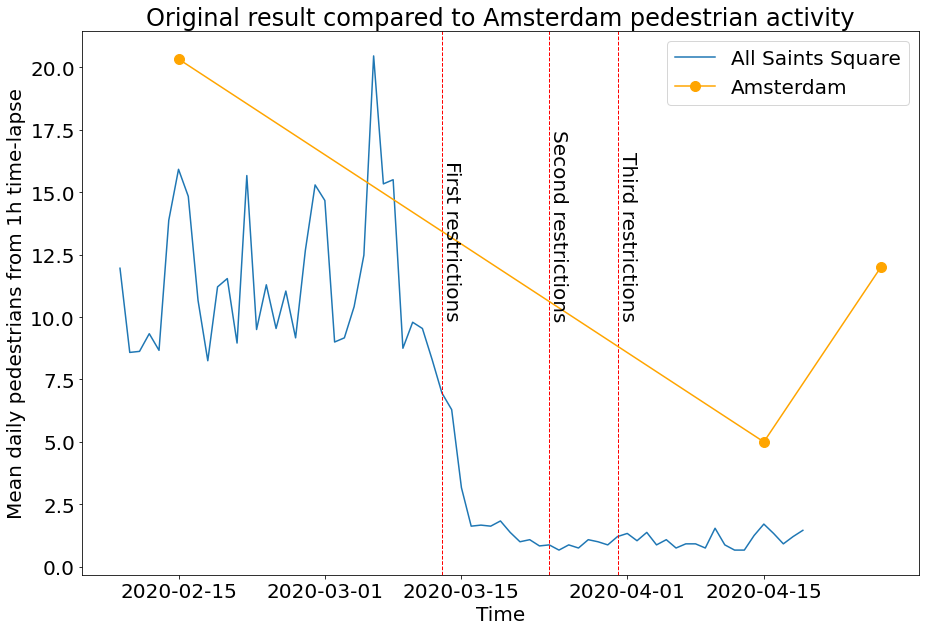

In [ ]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
plot_key_dates()

# amsterdam
plt.plot(amsterdam_points[0], amsterdam_points[1], marker='o',markersize=10,label='Amsterdam', color='orange')

plt.plot()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Original result compared to Amsterdam pedestrian activity')
plt.savefig(result_path + 'comparison_amsterdam.jpg')

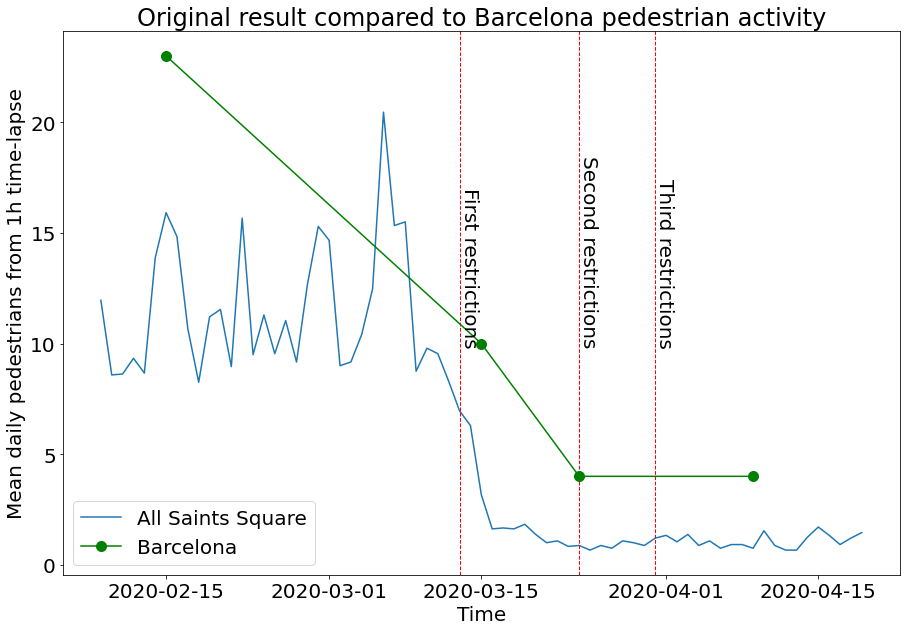

In [ ]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
plot_key_dates()

# barcelona
plt.plot(barcelona_points[0], barcelona_points[1], marker='o',markersize=10,label='Barcelona', color='green')

plt.plot()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Original result compared to Barcelona pedestrian activity')
plt.savefig(result_path + 'comparison_barcelona.jpg')

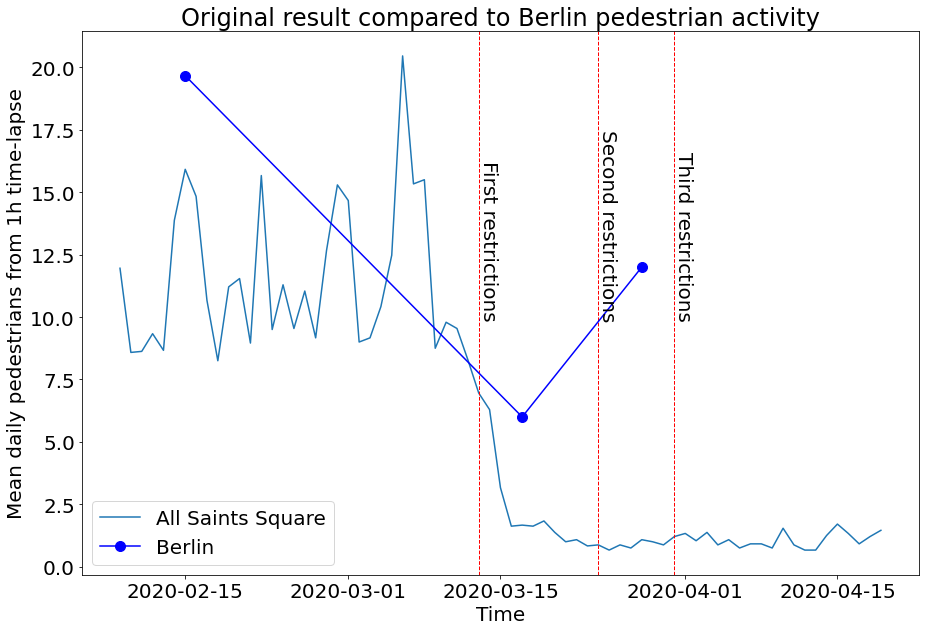

In [ ]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
plot_key_dates()

# berlin
plt.plot(berlin_points[0], berlin_points[1], marker='o',markersize=10,label='Berlin', color='blue')

plt.plot()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Original result compared to Berlin pedestrian activity')
plt.savefig(result_path + 'comparison_berlin.jpg')

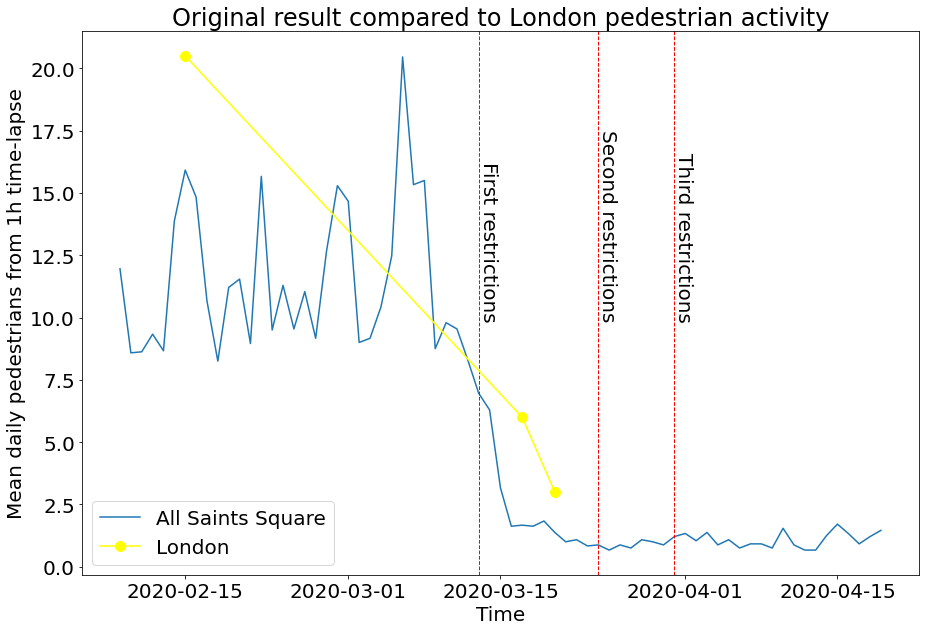

In [ ]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
plot_key_dates()

# london
plt.plot(london_points[0], london_points[1], marker='o',markersize=10,label='London', color='yellow')

plt.plot()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Original result compared to London pedestrian activity')
plt.savefig(result_path + 'comparison_london.jpg')

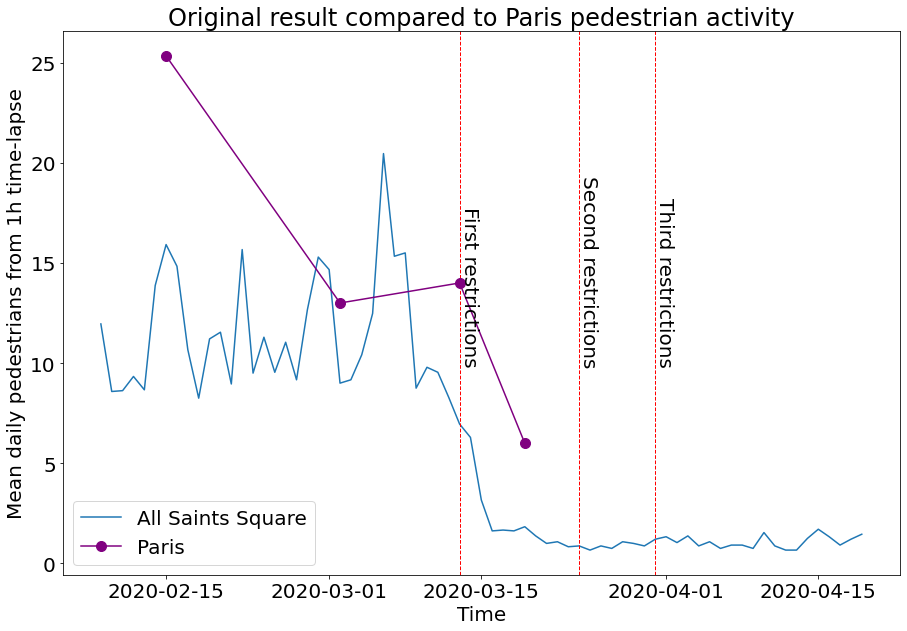

In [ ]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
plot_key_dates()

# paris
plt.plot(paris_points[0], paris_points[1], marker='o',markersize=10,label='Paris', color='purple')

plt.plot()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Original result compared to Paris pedestrian activity')
plt.savefig(result_path + 'comparison_paris.jpg')

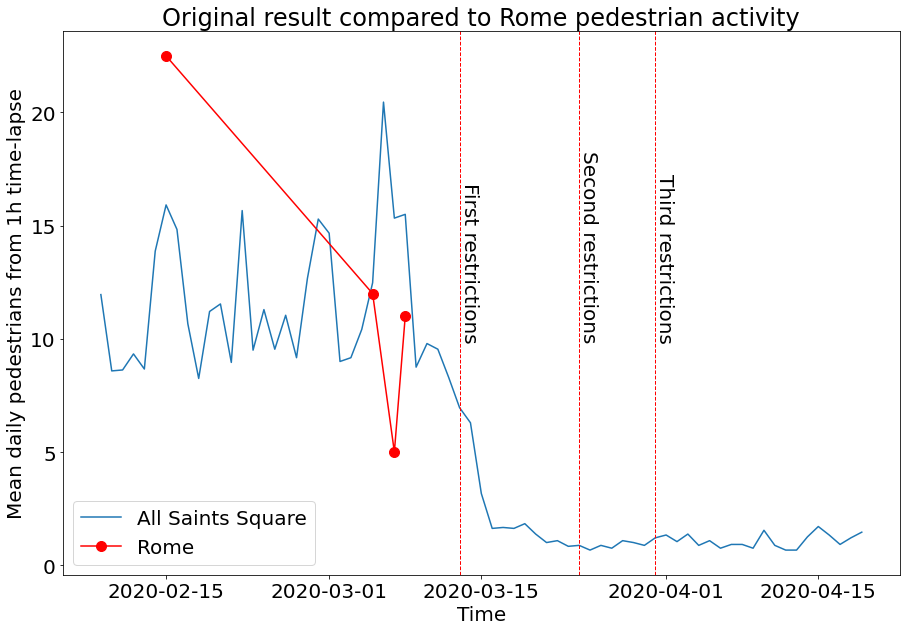

In [ ]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
plot_key_dates()

# rome
plt.plot(rome_points[0], rome_points[1], marker='o',markersize=10,label='Rome', color='red')

plt.plot()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Original result compared to Rome pedestrian activity')
plt.savefig(result_path + 'comparison_rome.jpg')

#### Plots of the original result with respect to all the cities

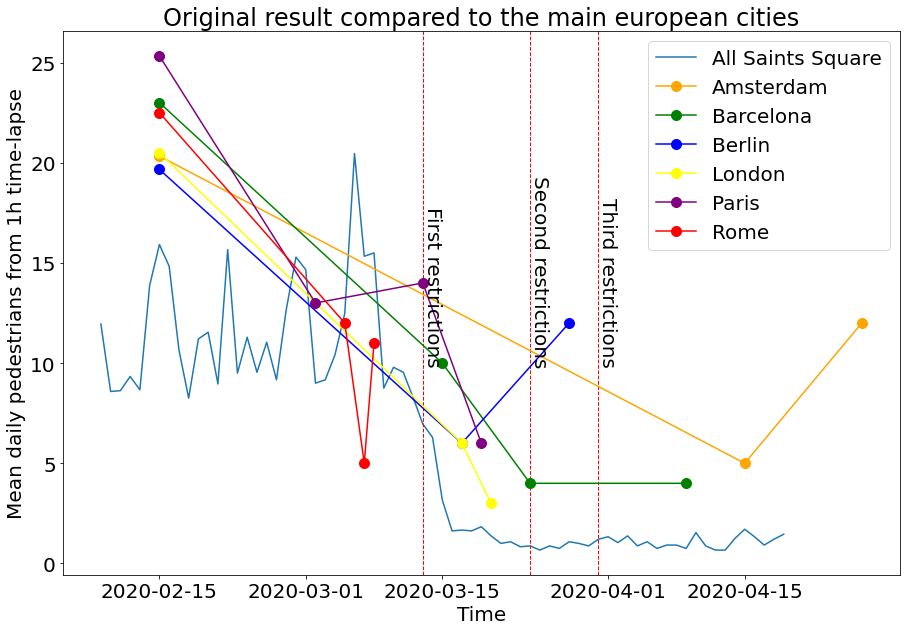

In [ ]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
plot_key_dates()

# amsterdam
plt.plot(amsterdam_points[0], amsterdam_points[1], marker='o',markersize=10,label='Amsterdam', color='orange')

# barcelona
plt.plot(barcelona_points[0], barcelona_points[1], marker='o',markersize=10,label='Barcelona', color='green')

# berlin
plt.plot(berlin_points[0], berlin_points[1], marker='o',markersize=10,label='Berlin', color='blue')

# london
plt.plot(london_points[0], london_points[1], marker='o',markersize=10,label='London', color='yellow')

# paris
plt.plot(paris_points[0], paris_points[1], marker='o',markersize=10,label='Paris', color='purple')

# rome
plt.plot(rome_points[0], rome_points[1], marker='o',markersize=10,label='Rome', color='red')

plt.plot()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.title('Original result compared to the main european cities')
plt.savefig(result_path + 'comparison_total.jpg')